# Decision Tree Classification on Cars Dataset

**Import the required Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sb 

**Read the data set**

In [2]:
carsDataSet = pd.read_csv("Cars93.csv")
carsDataSet.head(3)

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90


**Drop the first column as it is unwanted**

In [3]:
cars=carsDataSet.drop(labels ="Unnamed: 0" ,axis = 1)
cars.head(3)

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90


In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 27 columns):
Manufacturer          93 non-null object
Model                 93 non-null object
Type                  93 non-null object
Min.Price             93 non-null float64
Price                 93 non-null float64
Max.Price             93 non-null float64
MPG.city              93 non-null int64
MPG.highway           93 non-null int64
AirBags               93 non-null object
DriveTrain            93 non-null object
Cylinders             93 non-null object
EngineSize            93 non-null float64
Horsepower            93 non-null int64
RPM                   93 non-null int64
Rev.per.mile          93 non-null int64
Man.trans.avail       93 non-null object
Fuel.tank.capacity    93 non-null float64
Passengers            93 non-null int64
Length                93 non-null int64
Wheelbase             93 non-null int64
Width                 93 non-null int64
Turn.circle           93 non-null int64


**Data Pre-processing**

In [5]:
cars.isnull().sum()

Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags                0
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
Make                   0
dtype: int64

**Exploratory Data Analysis(EDA)**

In [6]:
#seggregating categorical and continuous variables into its corresponsing lists for 
#further data visualization.

categoricalColumnsList = []
continuousColumnsList = []

def catcon(dataset):
    for colNames in dataset.columns:
        if dataset[colNames].dtypes =="object":
            categoricalColumnsList.append(colNames)
        else:
            continuousColumnsList.append(colNames)
    return categoricalColumnsList,continuousColumnsList

In [7]:
categorical,continuous = catcon(cars)

In [8]:
print("Categorical columns : %s"%categorical)
print("                                 ")
print("Continuous columns : %s"%continuous)

Categorical columns : ['Manufacturer', 'Model', 'Type', 'AirBags', 'DriveTrain', 'Cylinders', 'Man.trans.avail', 'Origin', 'Make']
                                 
Continuous columns : ['Min.Price', 'Price', 'Max.Price', 'MPG.city', 'MPG.highway', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room', 'Weight']


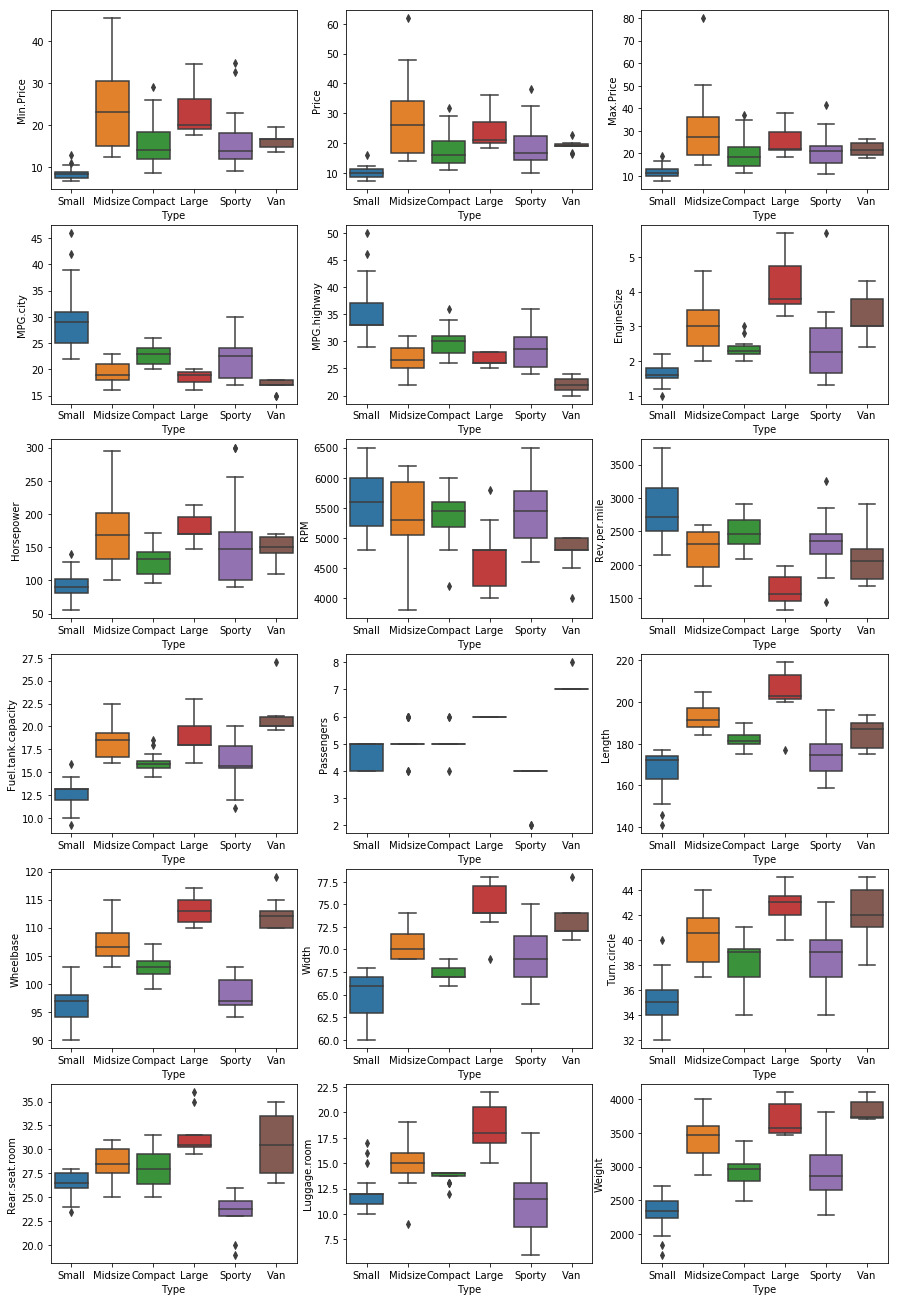

In [9]:
plt.figure(figsize=(15,27))
j= 1
for contColumns in continuous:
    plt.subplot(7,3,j)
    sb.boxplot(cars.Type,cars[contColumns])
    plt.xlabel("Type")
    plt.ylabel("%s"%contColumns)
    j = j +1
plt.show()

**Identify the unique elements of the categorical data variable "Type"**

In [10]:
print(cars['Type'].unique())

['Small' 'Midsize' 'Compact' 'Large' 'Sporty' 'Van']


**Count the number of unique elements of the categorical data variable "Type"**

In [11]:
cars['Type'].value_counts()

Midsize    22
Small      21
Compact    16
Sporty     14
Large      11
Van         9
Name: Type, dtype: int64

**Label Encoding**

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cars=cars.apply(le.fit_transform)

# Decision Tree Classification

**Prepare the data for sampling**

In [13]:
X = cars[cars.columns[~cars.columns.isin(["Type"])]]
Y = cars[["Type"]]

**Split the data into training and testing sets**

In [14]:
from sklearn.model_selection import train_test_split

# splits the training and test data set in 80% : 20%
# assign random_state to any value.This ensures consistency.
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.2, random_state=20)

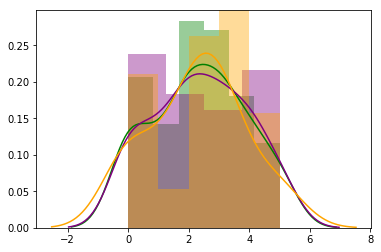

In [15]:
#check if the sampling done is good or bad

sb.distplot(Y,color = "green")
sb.distplot(ytrain,color = "purple")
sb.distplot(ytest,color = "orange")

**Observation : The sampling done is good.**

**Create a dictionary of parameters to be tuned **

In [16]:
tp = {"criterion":["gini","entropy"],"max_leaf_nodes":range(2,75,1)}

**Create the model using sklearn DecisionTreeClassifier**

In [17]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state= 34)

**Find the best value of tuning parameter to reduce the model error using cross validation**

In [18]:
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(dtc,tp,scoring="accuracy",cv=4)
modelDecisionTreeClassifer = cv.fit(xtrain,ytrain)
dtcBestParams=modelDecisionTreeClassifer.best_params_
print("The best parameters for Decision Tree Classifier are %s  "%dtcBestParams)

The best parameters for Decision Tree Classifier are {'criterion': 'entropy', 'max_leaf_nodes': 8}  


/home/varshita/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [19]:
dtc = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=8, random_state= 34)
modelDecisionTreeClassifer = dtc.fit(xtrain,ytrain)

**Build Predictions**

In [20]:
predDecisionTreeClassifer=modelDecisionTreeClassifer.predict(xtest)

**Confusion matrix and Accuracy score for Decision Tree Classification**

The accuracy score for Decision Tree Classification is 0.74


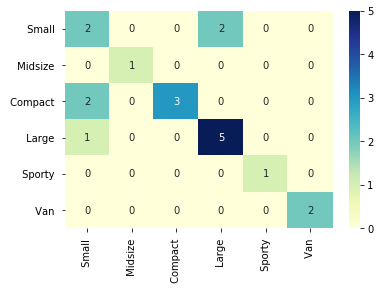

In [21]:
from sklearn.metrics import confusion_matrix,accuracy_score

cmDecisionTreeClassifer=confusion_matrix(ytest,predDecisionTreeClassifer)

xAxisLabels = [' Small ',' Midsize ',' Compact ',' Large ',' Sporty ',' Van '] # labels for x-axis
yAxisLabels = [' Small ',' Midsize ',' Compact ',' Large ',' Sporty ',' Van '] # labels for y-axis

# create seaborn heatmap with required labels
sb.heatmap(cmDecisionTreeClassifer, annot=True,cmap = "YlGnBu",xticklabels=xAxisLabels, yticklabels=yAxisLabels)

print("The accuracy score for Decision Tree Classification is %.2f"%accuracy_score(ytest,predDecisionTreeClassifer))

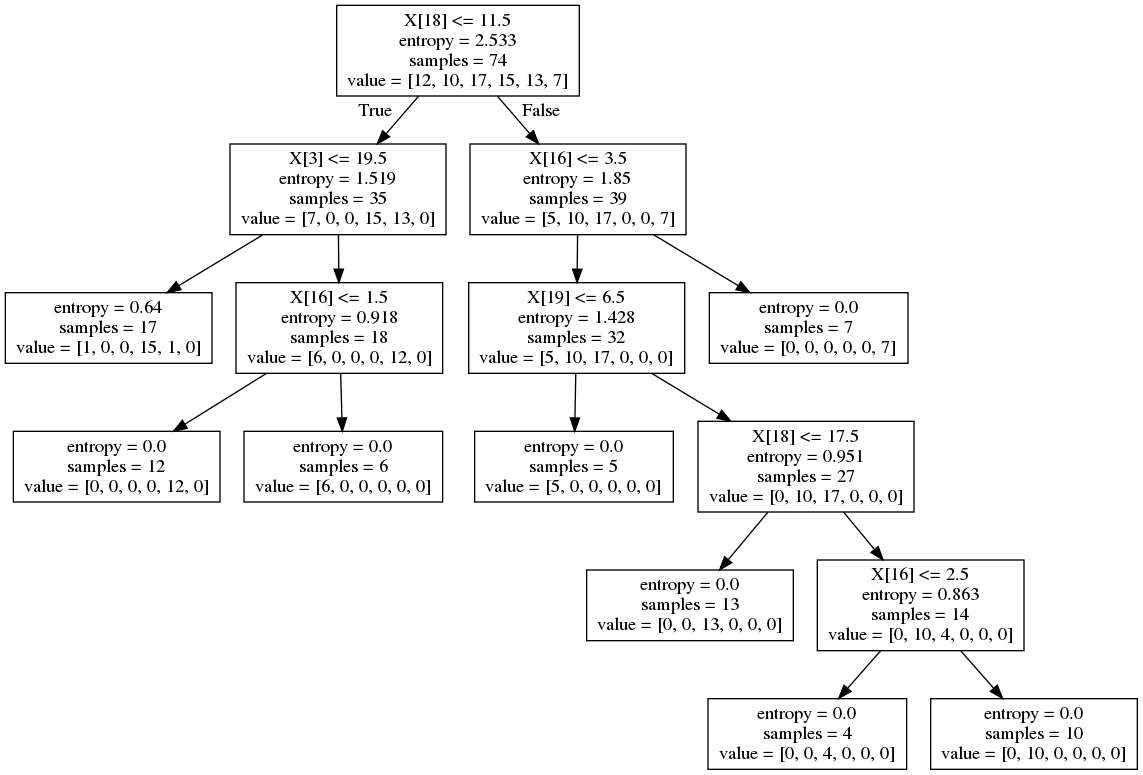

In [22]:
#Visualization of decision tree classifier

from sklearn.tree import export_graphviz
export_graphviz(dtc,out_file="decisionTreeClassifier.dot")

from pydotplus.graphviz import graph_from_dot_file
graph = graph_from_dot_file("decisionTreeClassifier.dot")

from IPython.display import Image
Image(graph.create_png())